In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import zipfile
from PIL import Image
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
with zipfile.ZipFile("C:\\Users\\chakr\\Downloads\\archive.zip" ,'r') as zip_ref:
    zip_ref.extractall('C:\\Users\\chakr\\Downloads')

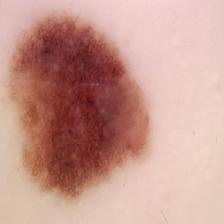

In [2]:
Image.open("C:\\Users\\chakr\\Downloads\\Cancer Dataset\\train\\Malignant\\95.jpg")

In [2]:
test_df=tf.keras.utils.image_dataset_from_directory(
directory = 'C:\\Users\\chakr\\Downloads\\Cancer Dataset\\test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))


Found 2000 files belonging to 2 classes.


In [3]:
train_df=tf.keras.utils.image_dataset_from_directory(
directory = 'C:\\Users\\chakr\\Downloads\\Cancer Dataset\\train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))


Found 11879 files belonging to 2 classes.


In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_df = train_df.map(process)
test_df = test_df.map(process)

In [5]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"), 
#                                                  input_shape=(180, 
#                                                               180,
#                                                               3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
#     tf.keras.layers.experimental.RandomBrightness(0.2)

      
  ]
)


In [13]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), padding='same', activation='relu',strides=(2,2),filters=20,input_shape=(None,180,180,3)),
  tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Conv2D(kernel_size=(3, 3), padding='same', activation='relu',strides=(2,2),filters=20),
#    tf.keras.layers.MaxPooling2D(),
  
   tf.keras.layers.Conv2D(kernel_size=(3, 3), padding='same', activation='relu',strides=(2,2),filters=20),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
#     model.add(BatchNormalization()),

  tf.keras.layers.MaxPooling2D(pool_size=(1,1),strides=2,padding='valid'),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
#         model.add(BatchNormalization()),

  tf.keras.layers.MaxPooling2D(16, 3, padding='same'),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'),
#         model.add(BatchNormalization()),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),

      tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),

      tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history=model.fit(train_df,  epochs=9,validation_data=test_df)  

Epoch 1/9
372/372 [==============================] - 56s 140ms/step - loss: 0.5706 - accuracy: 0.6895 - val_loss: 0.5378 - val_accuracy: 0.7595
Epoch 2/9
372/372 [==============================] - 49s 131ms/step - loss: 0.4442 - accuracy: 0.7936 - val_loss: 0.4230 - val_accuracy: 0.8040
Epoch 3/9
372/372 [==============================] - 49s 132ms/step - loss: 0.4063 - accuracy: 0.8169 - val_loss: 0.4206 - val_accuracy: 0.8290
Epoch 4/9
372/372 [==============================] - 51s 136ms/step - loss: 0.3794 - accuracy: 0.8334 - val_loss: 0.4221 - val_accuracy: 0.8125
Epoch 5/9
372/372 [==============================] - 50s 133ms/step - loss: 0.3748 - accuracy: 0.8372 - val_loss: 0.3533 - val_accuracy: 0.8520
Epoch 6/9
372/372 [==============================] - 50s 133ms/step - loss: 0.3644 - accuracy: 0.8369 - val_loss: 0.5120 - val_accuracy: 0.7475
Epoch 7/9
372/372 [==============================] - 50s 135ms/step - loss: 0.3536 - accuracy: 0.8442 - val_loss: 0.3569 - val_accuracy:

In [9]:
tf.keras.models.save_model(model,'cancer_detect_2.hdf5')

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('C:\\Users\\chakr\\cancer_detect_2.hdf5')

# Define a dictionary to map predicted class labels to cancer type
cancer_label_dict = {0: 'benign', 1: 'Malignant'}

# Define a function to predict the cancer type from an image
def predict_cancer(image):
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = loaded_model.predict(image)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Initialize the video capture object
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Break the loop if the frame cannot be read
    if not ret:
        break

    # Predict the cancer type in the frame
    predicted_class = predict_cancer(frame)

    # Print the predicted cancer type on the frame
    cv2.putText(frame, cancer_label_dict[predicted_class], (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Cancer Detector', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 27ms/step


In [5]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('C:\\Users\\chakr\\cancer_detect.hdf5')

# Define a dictionary to map predicted class labels to flower names
cancer_label_dict = {0: 'benign', 1: 'Malignant'}

# Define a function to predict the flower type from an image
def predict_cancer(image):
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = loaded_model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    return predicted_class, confidence

# Initialize the video capture object
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Break the loop if the frame cannot be read
    if not ret:
        break

    # Predict the flower type in the frame
    predicted_class, confidence = predict_cancer(frame)

    # Print the predicted flower type and confidence score on the frame
    cv2.putText(frame, f'Prediction: {cancer_label_dict[predicted_class]}, Confidence: {confidence:.2f}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Cancer Detector', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


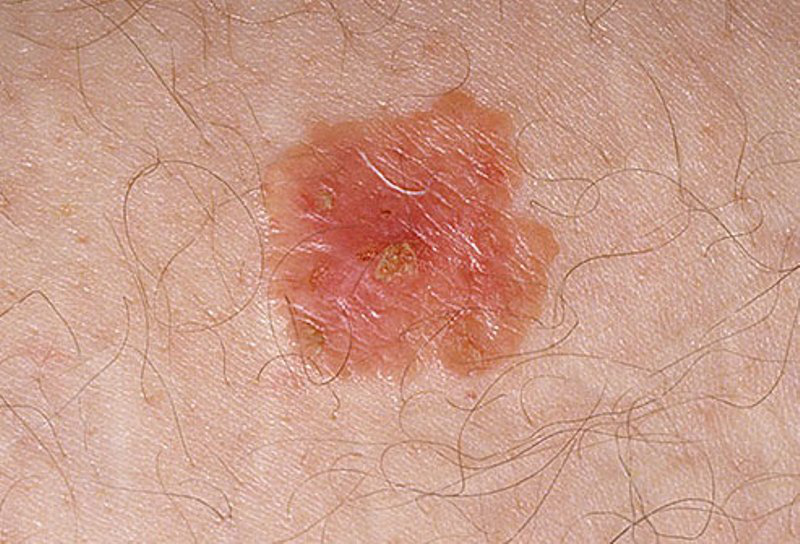

In [11]:
Image.open("C:\\Users\\chakr\\OneDrive\\Desktop\\b.jpg")


In [12]:
from tensorflow.keras.preprocessing import image
img = image.load_img('C:\\Users\\chakr\\OneDrive\\Desktop\\m.jpg', target_size=(256, 256))

# Preprocess the image for prediction
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

# Predict the image
predictions = loaded_model.predict(img)

# Print the predictions
print(predictions)
predicted_class = np.argmax(predictions)
print(predicted_class)
print(    'confidence =', np.max(predictions)
)

1/1 [==============================] - 0s 63ms/step
[[0.45576558 0.51518166]]
1
confidence = 0.51518166
